# Introduction
This project is to predict the sale price of each house due to many factors. 

The data sets are from kaggle.

Created by Yuxin Zeng

Created time: August 3rd,2025


# load data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

2025-08-09 20:13:48.858372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754770429.112691      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754770429.184339      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Explore the data

In [2]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


show the distribution of sale prices

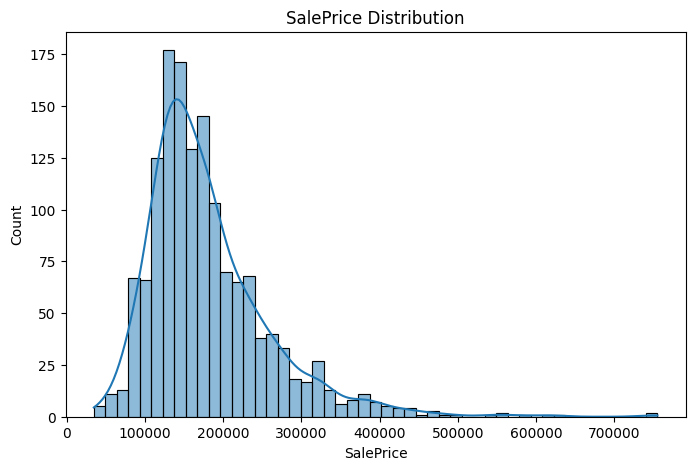

In [4]:
plt.figure(figsize = (8,5))
sns.histplot(train['SalePrice'], kde = True)
plt.title('SalePrice Distribution')
plt.show()

seen from the distribution sketch, most of the sale prices are between 100000 dollars and 300000 dollars, it's a right-skewed distribution.

show missing values and count the missing rate

In [5]:
missing_count = train.isnull().sum()
missing_rate = train.isnull().mean() * 100

missing_df = pd.concat([missing_count, missing_rate], axis = 1)
missing_df.columns = ['Missing Count', 'Missing Rate']

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Rate', ascending = False)

missing_df

,Missing Count,Missing Rate
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Seen from the table, we know that missing rates for PoolQC, MiscFeature, Alley, Fence,MasVnrType, and FireplaceQu are all more that 30%, so I will delete them because they will cause many imprecision. Also the ID column is also not necessary for model training, so I will also drop ID column.

In [6]:
drop_col = ['PoolQC', 'MiscFeature','Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'Id' ]
train.drop(columns=drop_col, inplace=True)
test.drop(columns=drop_col, inplace=True)

make sure that we drop the missing values correctly

In [7]:
print(train.columns)
train.head(3)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


we can see that PoolQC, MiscFeature, Alley, Fence,MasVnrType, FireplaceQu, and Id had been deleted

for the missing data for other columns, I will use median to fill the missing values for numerical columns, and for type columns, I will use 'Missing'.

In [8]:
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

cat_cols = train.select_dtypes(include=['object']).columns
train[cat_cols] = train[cat_cols].fillna('Missing')

# Numerical data distribution
we can see that the not all the data are numerical, so we need to see how the numerical data distribute. 

In [9]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [10]:
train_num = train.select_dtypes(include = ['float64', 'int64'] )
train_num.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


make histogram for all the numerical data

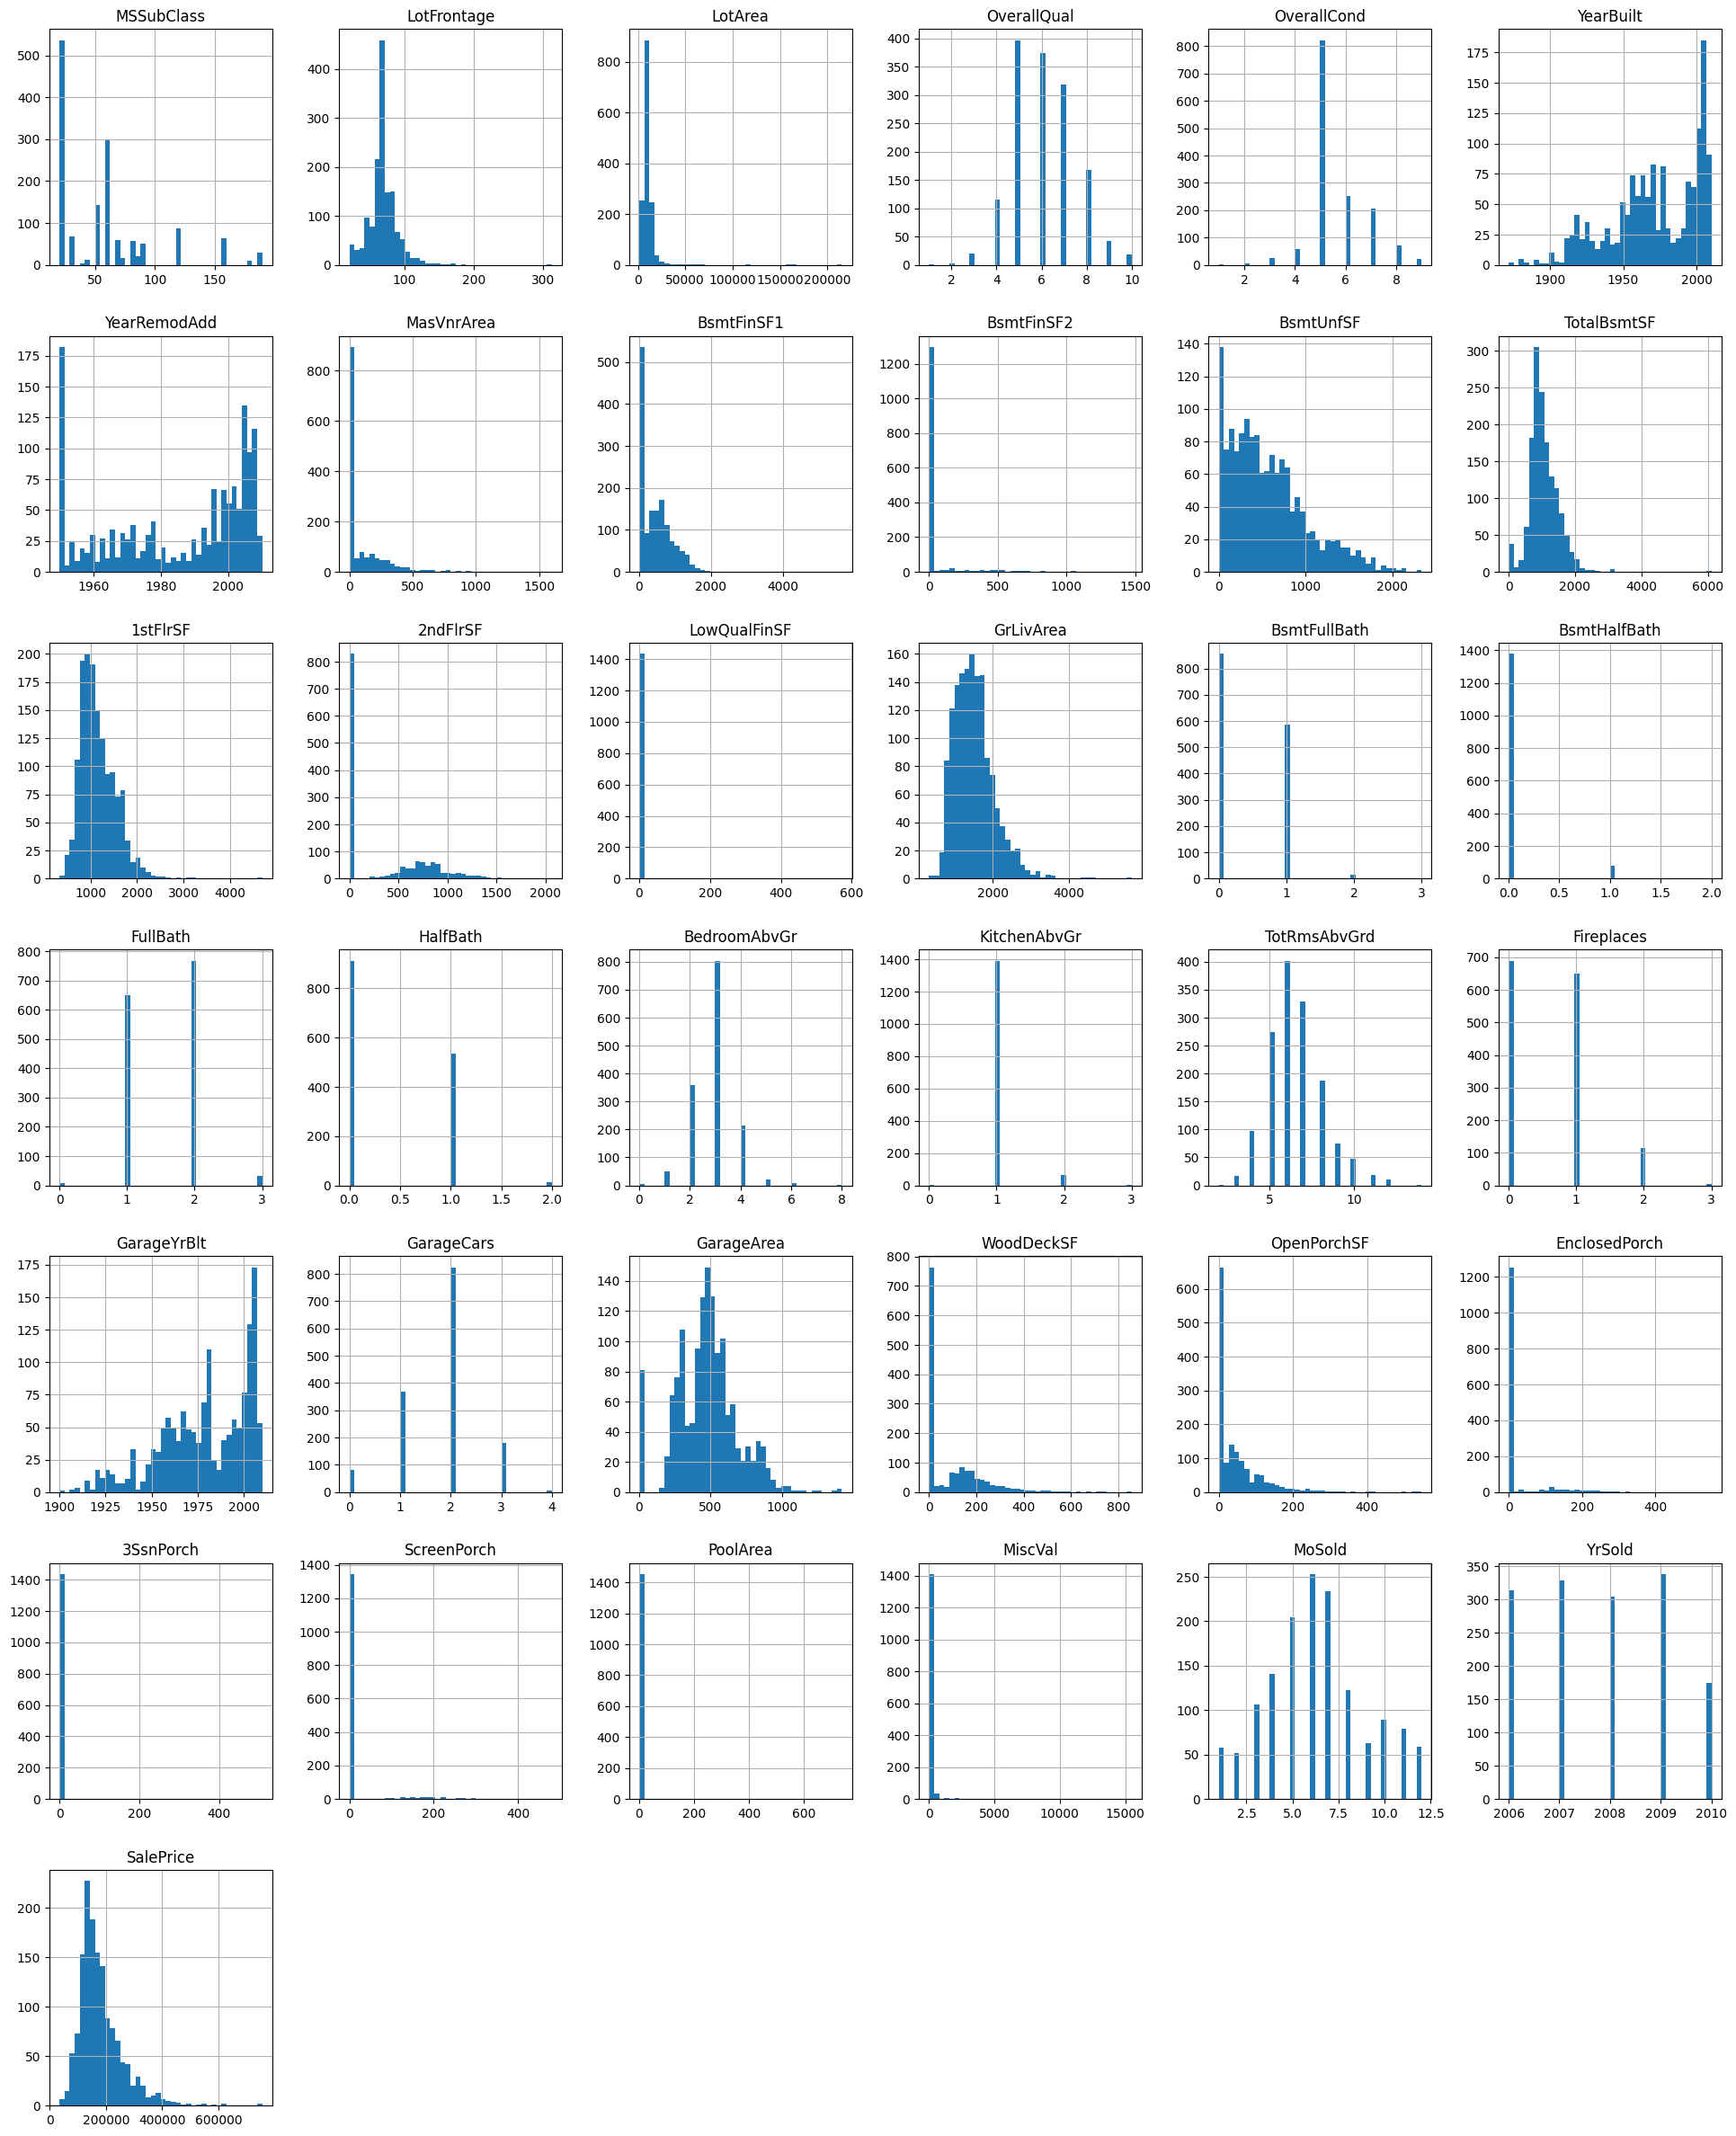

In [11]:
train_num.hist(figsize = (24, 30), bins = 40, xlabelsize = 10, ylabelsize = 10);

# Study the dataset

combine training and testing dataset

In [12]:
train['is_train'] = 1
test['is_train'] = 0
test['SalePrice'] = np.nan 

full_df = pd.concat([train, test], axis=0).reset_index(drop=True)

print(full_df.shape)
print(full_df.isnull().sum().sort_values(ascending=False).head(10))

(2919, 75)
SalePrice       1459
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
dtype: int64


Find the categorical variables


In [13]:
cat_cols = full_df.select_dtypes(include=['object']).columns

transfer non-numerical data into numerical features

In [14]:
full_df_encoded = pd.get_dummies(full_df, columns=cat_cols, drop_first=True)

# Train Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_df = full_df_encoded[full_df_encoded['is_train'] == 1].drop(columns=['is_train'])
test_df = full_df_encoded[full_df_encoded['is_train'] == 0].drop(columns=['is_train', 'SalePrice'])

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


create a random forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

rmse_rf = mean_squared_error(y_valid, y_pred, squared=False)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest RMSE: 29472.14


The model had been completed but the RMSE is too high, so the model needs to be improved.

In [17]:
raw_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

test_df_filled = test_df.fillna(test_df.mean())

predictions = rf_model.predict(test_df_filled)

submission = pd.DataFrame({
    'Id': raw_test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission.csv', index=False)